In [9]:
import os

train_dir = './dataset/train'
test_dir = './dataset/test'

print("Train Directory Contents:")
for root, dirs, files in os.walk(train_dir):
    print(f"Root: {root}, Directories: {dirs}, Files: {files}")

print("\nTest Directory Contents:")
for root, dirs, files in os.walk(test_dir):
    print(f"Root: {root}, Directories: {dirs}, Files: {files}")


Train Directory Contents:
Root: ./dataset/train, Directories: ['no_tumor', 'tumor'], Files: []
Root: ./dataset/train\no_tumor, Directories: [], Files: ['1 no.jpeg', '10 no.jpg', '11 no.jpg', '12 no.jpg', '13 no.jpg', '14 no.jpg', '15 no.jpg', '17 no.jpg', '18 no.jpg', '19 no.jpg', '2 no.jpeg', '20 no.jpg', '21 no.jpg', '22 no.jpg', '23 no.jpg', '24 no.jpg', '25 no.jpg', '26 no.jpg', '27 no.jpg', '28 no.jpg', '29 no.jpg', '3 no.jpg', '30 no.jpg', '31 no.jpg', '32 no.jpg', '33 no.jpg', '34 no.jpg', '35 no.jpg', '36 no.jpg', '37 no.jpg', '38 no.jpg', '39 no.jpg', '4 no.jpg', '40 no.jpg', '41 no.jpg', '42 no.jpg', '43 no.jpg', '44no.jpg', '45 no.jpg', '46 no.jpg', '47 no.jpg', '48 no.jpeg', '49 no.jpg', '5 no.jpg', '50 no.jpg', '6 no.jpg', '7 no.jpg', '8 no.jpg', '9 no.jpg', 'N1.JPG', 'N11.jpg', 'N15.jpg', 'N16.jpg', 'N17.jpg', 'N19.JPG', 'N2.JPG', 'N20.JPG', 'N21.jpg', 'N22.JPG', 'N26.JPG', 'N3.jpg', 'N5.jpg', 'N6.jpg', 'no 1.jpg', 'no 10.jpg', 'no 100.jpg', 'no 2.jpg', 'no 3.jpg', 'no 4.

In [10]:
print("Train Samples:")
print("Tumor:", len(os.listdir(os.path.join(train_dir, 'tumor'))))
print("No Tumor:", len(os.listdir(os.path.join(train_dir, 'no_tumor'))))

print("\nTest Samples:")
print("Tumor:", len(os.listdir(os.path.join(test_dir, 'tumor'))))
print("No Tumor:", len(os.listdir(os.path.join(test_dir, 'no_tumor'))))


Train Samples:
Tumor: 155
No Tumor: 98

Test Samples:
Tumor: 155
No Tumor: 98


In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import cv2
from sklearn.model_selection import train_test_split




In [5]:
# Definisikan direktori dataset
train_dir = './dataset/train'
test_dir = './dataset/test'

In [8]:
# Kemudian, definisikan ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# Memuat data pelatihan
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 253 images belonging to 2 classes.


In [10]:
# Memuat data pengujian
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 253 images belonging to 2 classes.


In [11]:
# Bangun model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [12]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:

# Pelatihan model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/30


c:\Users\budhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.4678 - loss: 0.6946 - val_accuracy: 0.6071 - val_loss: 0.6734
Epoch 2/30
1/7 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6562 - loss: 0.6265

c:\Users\budhi\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.6562 - loss: 0.6265 - val_accuracy: 0.6552 - val_loss: 0.6666
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.6177 - loss: 0.6774 - val_accuracy: 0.6161 - val_loss: 0.6499
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.5938 - loss: 0.6507 - val_accuracy: 0.5862 - val_loss: 0.6413
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6272 - loss: 0.6392 - val_accuracy: 0.6071 - val_loss: 0.6303
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.5938 - loss: 0.6369 - val_accuracy: 0.7241 - val_loss: 0.5797
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.6512 - loss: 0.6345 - val_accuracy: 0.6339 - val_loss: 0.6551
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.5938 - loss: 0.6397 - val_accuracy: 0.5172 - val_loss: 0.7313
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5918 - loss: 0.6616 - val_accuracy: 0.7455 - val_loss: 0.6006
Epoch 10/30
7/7

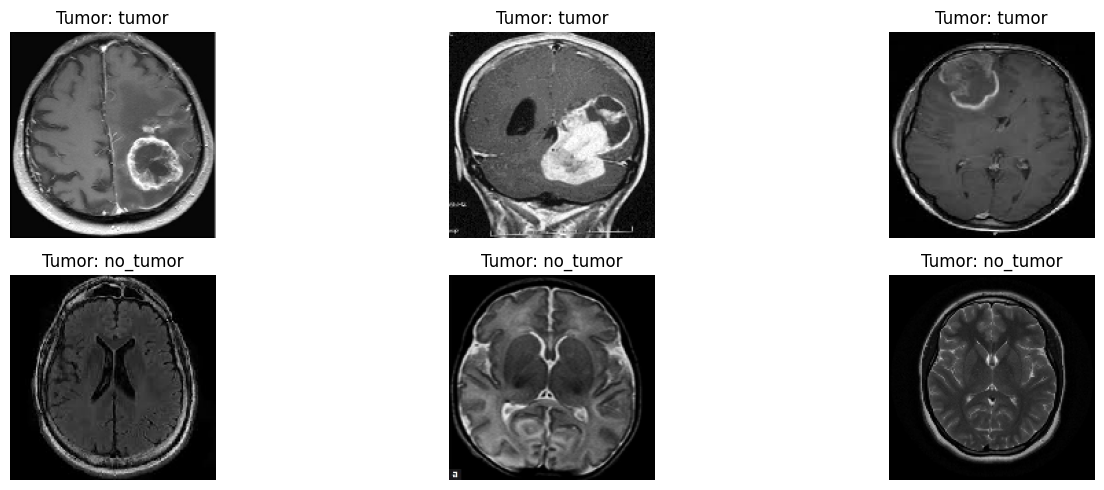

In [14]:
import matplotlib.pyplot as plt

# Mengambil beberapa sampel gambar dari generator data test
sample_images, sample_labels = next(test_generator)

plt.figure(figsize=(15, 5))

# Menampilkan gambar dengan label 'tumor'
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.imshow(sample_images[sample_labels == 1][i])  # Memfilter gambar dengan label 'tumor'
    plt.title("Tumor: tumor")  # Menggunakan nama folder 'tumor' sebagai label
    plt.axis('off')

# Menampilkan gambar dengan label 'no_tumor'
for i in range(3):
    plt.subplot(2, 3, i+4)
    plt.imshow(sample_images[sample_labels == 0][i])  # Memfilter gambar dengan label 'no_tumor'
    plt.title("Tumor: no_tumor")  # Menggunakan nama folder 'no_tumor' sebagai label
    plt.axis('off')

plt.tight_layout()
plt.show()


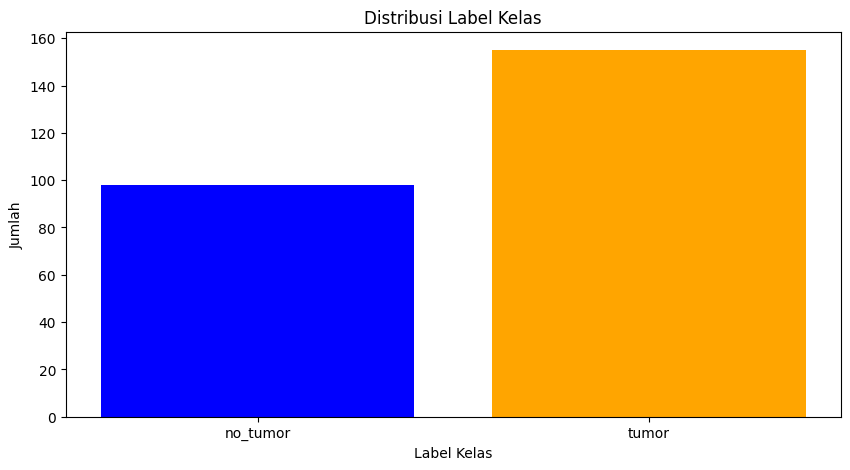

In [31]:
# Hitung frekuensi kemunculan setiap label kelas
unique_labels, label_counts = np.unique(train_generator.classes, return_counts=True)

# Plot distribusi label kelas
plt.figure(figsize=(10,5))
plt.bar(unique_labels, label_counts, color=['blue', 'orange'])
plt.xticks(unique_labels, ['no_tumor', 'tumor'])
plt.xlabel('Label Kelas')
plt.ylabel('Jumlah')
plt.title('Distribusi Label Kelas')
plt.show()

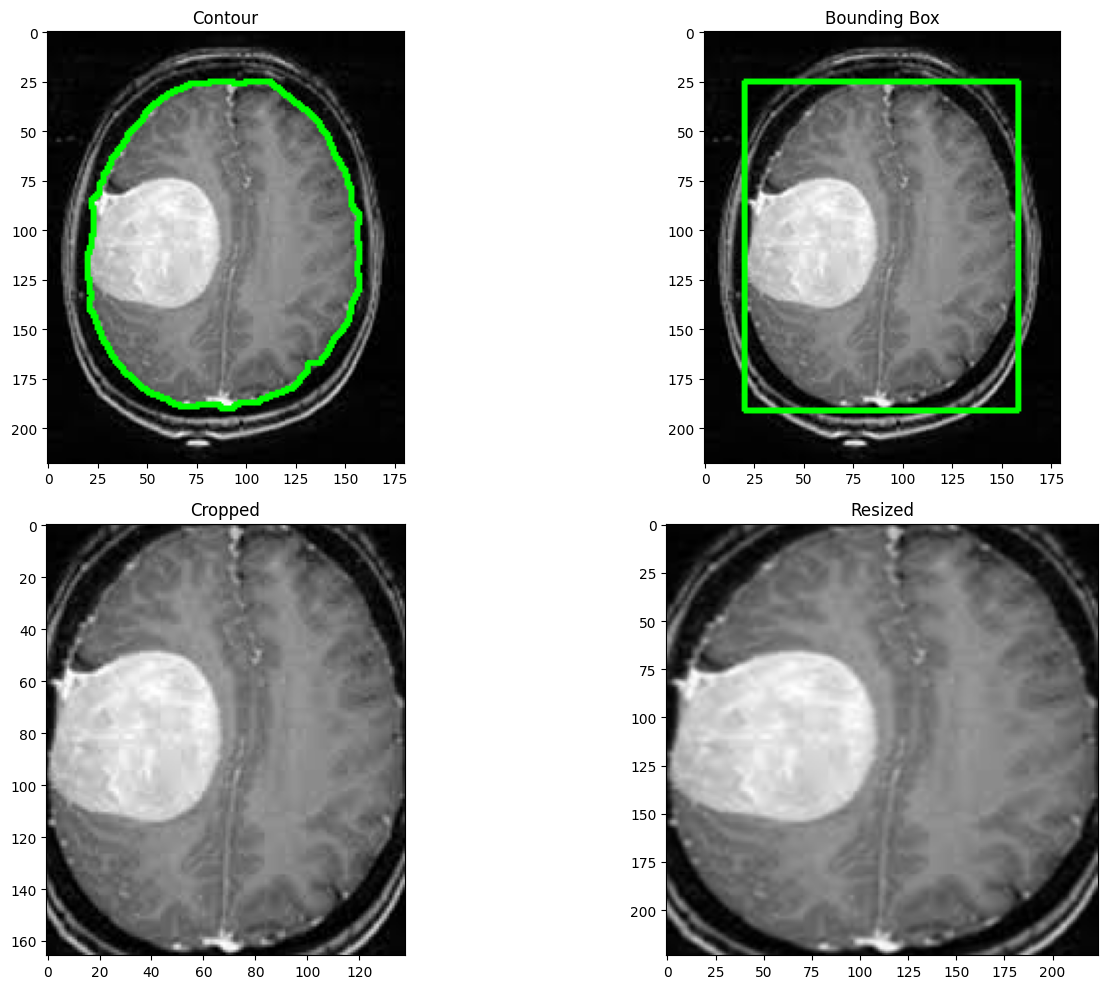

In [38]:
import cv2
import os
import matplotlib.pyplot as plt

def crop_brain_region(image, size):
    # Mengubah gambar menjadi skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Menerapkan Gaussian blur untuk meratakan gambar dan mengurangi noise
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Melakukan thresholding untuk membuat mask binary
    _, thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)
    
    # Melakukan operasi morfologi untuk menghilangkan noise
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
    
    # Mencari kontur pada mask binary
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Mengasumsikan bagian otak dari gambar memiliki kontur terbesar
    c = max(contours, key=cv2.contourArea)
    
    # Mendapatkan kotak pembatas bagian otak
    x, y, w, h = cv2.boundingRect(c)
    
    # Menggambar kontur pada gambar asli
    contour_image = cv2.drawContours(image.copy(), [c], -1, (0, 255, 0), 2)
    
    # Menggambar kotak pembatas pada gambar asli
    bounding_box_image = cv2.rectangle(image.copy(), (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    # Memotong gambar di sekitar kotak pembatas
    cropped_image = image[y:y+h, x:x+w]
    
    # Meresize gambar yang dipotong ke ukuran yang dibutuhkan
    resized_image = cv2.resize(cropped_image, size)
    
    return contour_image, bounding_box_image, cropped_image, resized_image

# Menentukan ukuran yang diinginkan untuk gambar yang diresize
output_size = (224, 224)

# Membaca contoh gambar
example_image_path = './dataset/train/tumor/Y1.jpg'
example_image = cv2.imread(example_image_path)
example_image = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)

# Melakukan crop dan resizing pada contoh gambar
contour_image, bounding_box_image, cropped_image, resized_image = crop_brain_region(example_image, output_size)

# Menampilkan hasil cropping
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(contour_image)
plt.title("Contour")

plt.subplot(2, 2, 2)
plt.imshow(bounding_box_image)
plt.title("Bounding Box")

plt.subplot(2, 2, 3)
plt.imshow(cropped_image)
plt.title("Cropped")

plt.subplot(2, 2, 4)
plt.imshow(resized_image)
plt.title("Resized")

plt.tight_layout()
plt.show()

# Membaca semua gambar
all_images = []
for folder in ['tumor', 'no_tumor']:
    folder_path = os.path.join('./dataset/train', folder)
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".jpeg"):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            all_images.append(image)

# Menyimpan hasil cropping dari semua gambar
all_cropped = []
for image in all_images:
    _, _, _, resized_image = crop_brain_region(image, output_size)
    all_cropped.append(resized_image)


In [55]:
from sklearn.model_selection import train_test_split

# Menyimpan label untuk setiap gambar
labels = []

# Menyimpan semua gambar yang telah diproses
all_cropped = []

# Memproses setiap folder ('tumor' dan 'no_tumor')
for folder in ['tumor', 'no_tumor']:
    folder_path = os.path.join('./dataset/train', folder)
    label = 1 if folder == 'tumor' else 0
    
    # Memproses setiap gambar di dalam folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".jpeg"):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # Memproses gambar dan menambahkannya ke daftar gambar yang telah diproses
            _, _, _, resized_image = crop_brain_region(image, output_size)
            all_cropped.append(resized_image)
            
            # Menambahkan label yang sesuai ke daftar label
            labels.append(label)

# Mengubah daftar gambar dan label menjadi array numpy
all_cropped = np.array(all_cropped)
labels = np.array(labels)

# Memisahkan data menjadi set pelatihan, validasi, dan pengujian
X_train, X_test, y_train, y_test = train_test_split(all_cropped, labels, test_size=0.2, shuffle=True, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [56]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (141, 224, 224, 3)
X_val shape: (18, 224, 224, 3)
X_test shape: (18, 224, 224, 3)
y_train shape: (141,)
y_val shape: (18,)
y_test shape: (18,)


Distribusi Label Kelas:
Kelas 0: 91 sampel
Kelas 1: 86 sampel


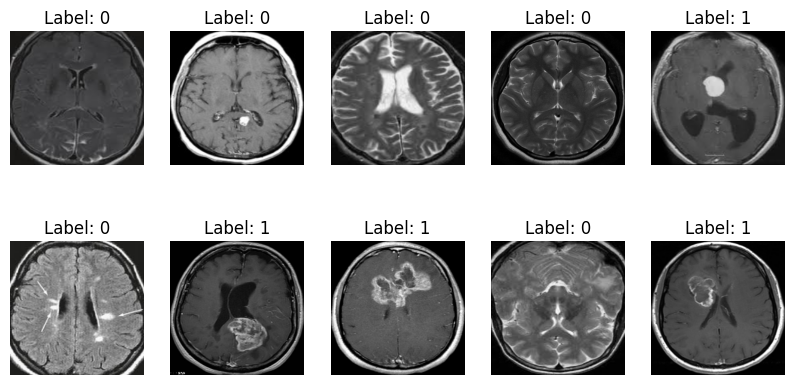

In [64]:
# Mengecek distribusi label kelas
unique_labels, label_counts = np.unique(labels, return_counts=True)
print("Distribusi Label Kelas:")
for label, count in zip(unique_labels, label_counts):
    print(f"Kelas {label}: {count} sampel")

# Menampilkan contoh gambar
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [65]:
# Definisi model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Tampilkan ringkasan model
model.summary()

c:\Users\budhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


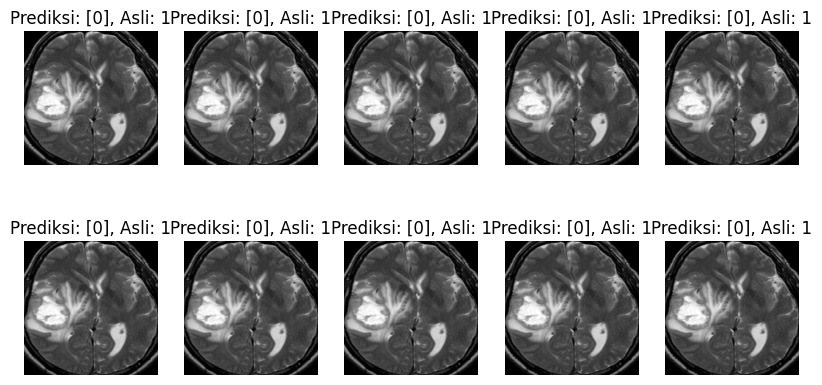

In [69]:
# Prediksi probabilitas kelas untuk data pengujian
y_probs = model.predict(X_test)

# Ambil kelas dengan probabilitas tertinggi sebagai prediksi
y_pred = (y_probs > 0.5).astype(int)

# Mencari indeks gambar yang salah diprediksi
incorrect_indices = np.where(y_pred != y_test)[0]

# Menampilkan beberapa contoh gambar yang salah diprediksi
plt.figure(figsize=(10, 5))
for i, idx in enumerate(incorrect_indices[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx])
    plt.title(f"Prediksi: {y_pred[idx]}, Asli: {y_test[idx]}")
    plt.axis('off')
plt.show()


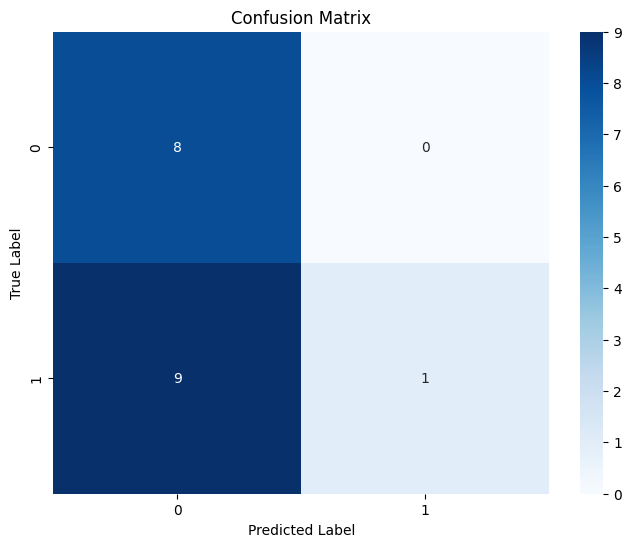

In [76]:
# 1. Analisis Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

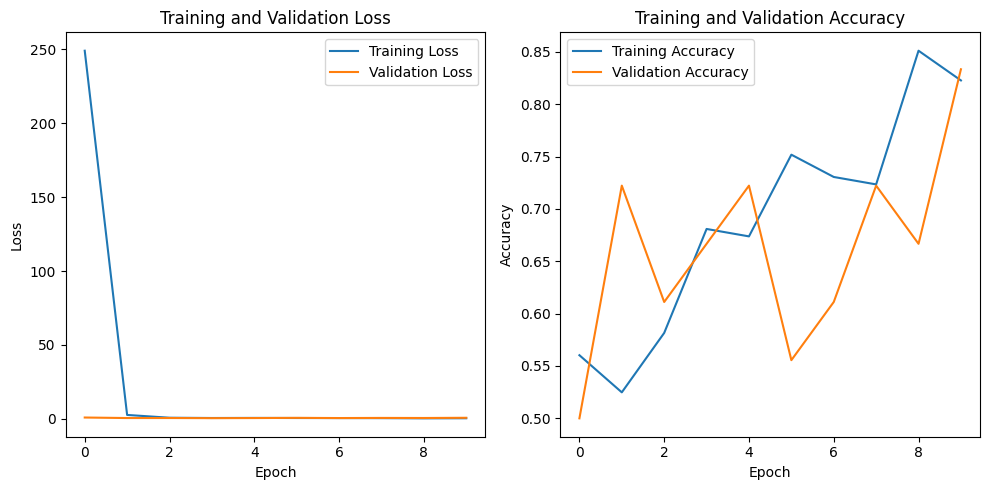

In [77]:
# 2. Analisis Kurva Pembelajaran
plt.figure(figsize=(10, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()